# Titanic Kaggle Project

### The Challange

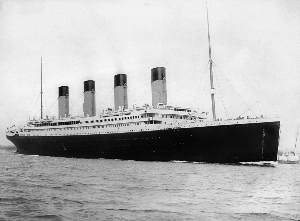

The sinking of the Titanic is one of the most infamous shipwrecks in history. 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive/ML model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

This is a supervised learning problem (since we have labels), furthermore it is a binary classification problem (Only two classes - survived (1) or not survived (0))

### Exploratory Data Analysis (EDA)

#### Summary Statisitics

In [28]:
# Import relevant python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
%matplotlib inline

In [3]:
# Load CSV data into notebook as a DataFrame using pandas 
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
# See first 5 rows of each DataFrame
display(df.head())
display(test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Data Dictionary

survival - Did they Survive or not? (1 = Yes, 0 = No)
pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Sex	- Gender
Age	- Age in years	
sibsp - # of siblings / spouses aboard the Titanic	
parch - # of parents / children aboard the Titanic	
ticket - Ticket number	
fare - Passenger fare	
cabin - Cabin number	
embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
# Info for the whole DataFrame
display(df.info())
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<font color='green'> We can see that this dataset is relatively clean, since it has already been preprocessed for us. However, there are null values in the 'Age', 'Cabin', 'Embarked' columns, which we'll have to deal with later on. We have 891 rows, which represent the 891 passengers we have data for including whether they survived. In Total, we have 12 columns from which we can make useful features from. </font>

In [6]:
# Let's look at some descriptive statistics for the numerical columns 
display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[3 1 2]
['S' 'C' 'Q' nan]


<font color='green'> <d> This shows us several insights:
<ul>
    <li> Only 38.38% of passengers survived </li>
<li> The vast majority of passengers were lower class (median ticket class is 3) </li>
<li> The passenger were fairly young, with the average being around 28 and 75% were younger than 38. However the oldesst person to board was 80 and there were also babies a few months old. </li>
<li> Average # of sibling/spouses was 0.5, but ranges from 0 to 8 </li>
<li> Average # of parents/children was 0.38, but ranges from 0 to 6 </li>
<li> Large disparity in the Fare paid by individuals(vast majority paid a low fair as 75% paid less than 31), however max paid is 512. Some people also boarded for free. </li> 
    </ul> </d> </font>

In [11]:
# Let's look at some categorical data 
display(df['Pclass'].value_counts())
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


<font color='green'> <ul>
    <li> Almost 500/891 passengers had 3rd class tickets </li>
    <li> Almost 600/891 were men </li>
    <li> Almost 650/891 boarded from southhampton </li>
</ul> </font>

In [20]:
# Using Group by
display(df.groupby('Sex')['Survived'].mean())
display(df.groupby('Pclass')['Survived'].mean())
display(df.groupby('Embarked')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<font color='green'> <ul>
    <li> 74.2% of females survived, whilst only 18.9% of men did </li>
    <li> The more upper class, the more likely you were to survive </li>
    <li> Passengers who embarked at Cherbourg were more likely to survive </li>
</ul> </font>

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


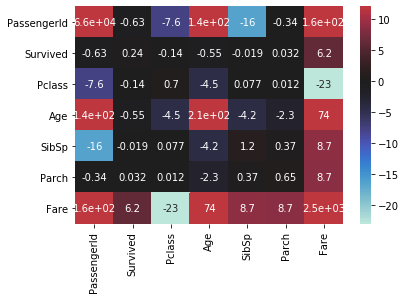

In [82]:
display(df.cov());
sns.heatmap(df.cov(), vmin=-23, vmax=12, annot=True, center=0)

<font color='green'> <ul>
    <li> Huge variation in Fare and Age </li>
    <li> Higher the Fare, more likley to sruvive, higher class, older, have family </li>
</ul> </font>

In [68]:
pd.pivot_table(df, values='Survived',index='Sex',columns='Pclass', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


<font color='green'> As we can almost all see 1st and 2nd class females survived. The two main insights we have so far are that sex and class are very strong predictors of survival.   </font>

#### Vizualization

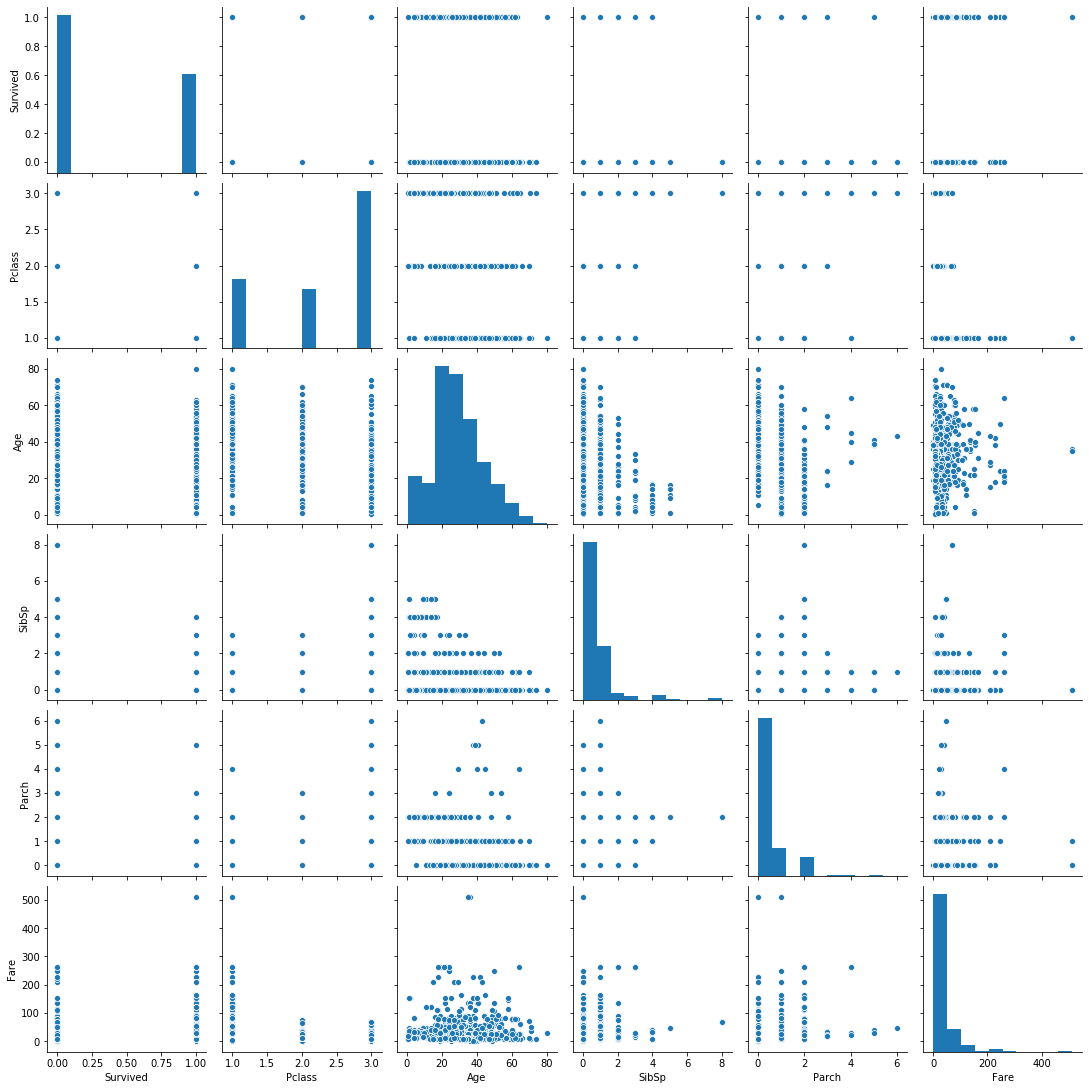

In [81]:
sns.pairplot(df.drop('PassengerId', axis=1));

<font color='green'> Positive skewed data for age, sibsp, parach and fair. Mean > medium, so majority of passengers lie in the lower end and only few in upper tail that disort the mean.  </font>

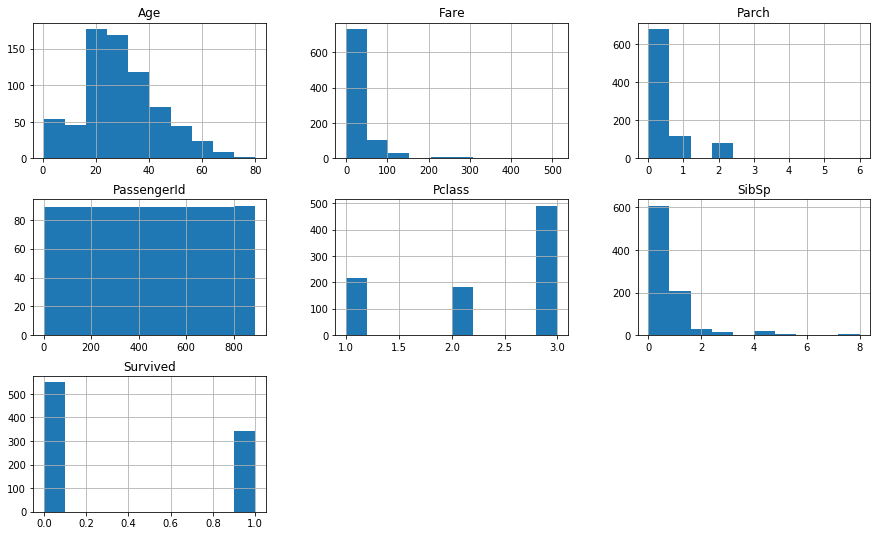

In [84]:
df.hist(figsize=(15,9));

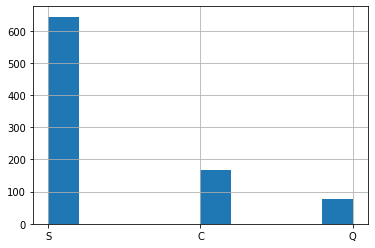

In [87]:
# Now let's explore some of the other columns such as Name, Ticket, Cabin, Embarked if we can
df['Embarked'].hist();

In [103]:
print(df[['Name','Ticket','Cabin','Embarked']].count())
print(df['Name'].unique().size)
print(df['Ticket'].unique().size)
print(df['Cabin'].unique().size)
print(df['Embarked'].value_counts())

Name        891
Ticket      891
Cabin       204
Embarked    889
dtype: int64
891
681
148
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [104]:
df['Name'].sample(50)

396                                  Olsson, Miss. Elina
143                                  Burke, Mr. Jeremiah
239                               Hunt, Mr. George Henry
582                           Downton, Mr. William James
571        Appleton, Mrs. Edward Dale (Charlotte Lamson)
887                         Graham, Miss. Margaret Edith
446                    Mellinger, Miss. Madeleine Violet
580                          Christy, Miss. Julie Rachel
376                      Landergren, Miss. Aurora Adelia
694                                      Weir, Col. John
566                                 Stoytcheff, Mr. Ilia
353                            Arnold-Franchi, Mr. Josef
140                        Boulos, Mrs. Joseph (Sultana)
476                              Renouf, Mr. Peter Henry
447                          Seward, Mr. Frederic Kimber
533               Peter, Mrs. Catherine (Catherine Rizk)
425                               Wiseman, Mr. Phillippe
25     Asplund, Mrs. Carl Oscar

<font color='green'> The passenger's full name is available including their Title (e.g. mr, mrs or miss) which can inform us of their marritial status. </font>

In [105]:
df['Ticket'].sample(50)

67             S.P. 3464
729     STON/O2. 3101271
793             PC 17600
573                14312
447               113794
440         F.C.C. 13529
73                  2680
425           A/4. 34244
603               364511
102                35281
599             PC 17485
117                11668
528              3101296
563      SOTON/OQ 392082
166               113505
96              PC 17754
809               113806
781                17474
128                 2668
649             CA. 2314
723               250643
71               CA 2144
501               364846
310                11767
192               350046
307             PC 17758
2       STON/O2. 3101282
694               113800
776               383121
297               113781
593               364848
395               350052
546                 2908
344               229236
110               110465
474                 7553
79                364516
25                347077
577                13507
433    STON/O 2. 3101274


In [107]:
df['Ticket'].head(50)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
30            PC 17601
31            PC 17569
32              335677
33          C.A. 24579
34            PC 17604
35              113789
36                2677
37          A./5. 2152
38              345764
39                2651
40                7546
41               11668
42              349253
43       SC

In [108]:
df['Ticket'].tail(50)

841         S.O./P.P. 3
842              113798
843                2683
844              315090
845           C.A. 5547
846            CA. 2343
847              349213
848              248727
849               17453
850              347082
851              347060
852                2678
853            PC 17592
854              244252
855              392091
856               36928
857              113055
858                2666
859                2629
860              350026
861               28134
862               17466
863            CA. 2343
864              233866
865              236852
866       SC/PARIS 2149
867            PC 17590
868              345777
869              347742
870              349248
871               11751
872                 695
873              345765
874           P/PP 3381
875                2667
876                7534
877              349212
878              349217
879               11767
880              230433
881              349257
882             

<font color='green'> The ticket column doesn't seem to give any useful information as far as predicting survival, hence we can possibly remove this later  </font>

In [110]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<font color='green'> Several broad cabin types: A, B, C, D, E. A is probably the best & most expensive, followed by B, ect. This may be a good predictor of survival. </font>

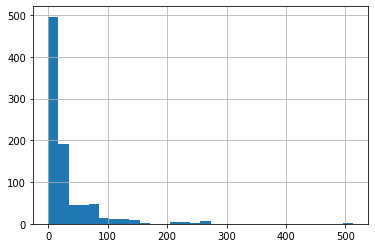

In [132]:
df['Fare'].hist(bins=30);

In [154]:
df['fare_bin']=pd.cut(df['Fare'],bins=[0,10,30,100,np.inf], labels=['low', 'medium', 'high', 'very high'])
df.groupby('fare_bin')['Survived'].mean()

fare_bin
low          0.205607
medium       0.433022
high         0.535912
very high    0.735849
Name: Survived, dtype: float64

<font color='green'> This is a pretty good feature to predict is someone survives or not. </font>